<a href="https://colab.research.google.com/github/kangjunseo/MachineLearning/blob/main/Machine%20Learning%20Algorithms_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gaussian Processes

Machine Learning Algorithms

Dates: 2022-4-22

Author: Yung-Kyun Noh

Department of Computer Science, Hanyang University & KIAS

Ref: https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

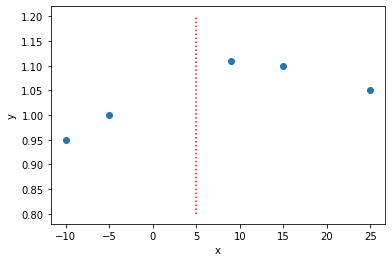

In [2]:
# Data generation
xs = np.array([-10, -5, 9, 15, 25])
ys = np.array([.95, 1, 1.11, 1.1, 1.05])
x_test = np.array([5.])

plt.scatter(xs, ys)
plt.vlines(x_test, 0.8, 1.2, color="red",linestyles="dotted")
plt.xlabel('x')
plt.ylabel('y')

# if x=5, what will be y?
# most of people will expect about 1.05
#
# but why not other places?
# because we have prior that model will be "smoother"
#

In [3]:
def k_fun(X_1, X_2, gamma = .005):
    return np.exp(-gamma*(
        np.diag(np.matmul(X_1, X_1.T)).reshape([-1,1]) + np.diag(np.matmul(X_2, X_2.T)).reshape([1,-1]) - \
        2*np.matmul(X_1, X_2.T))) # exp(-gamma((x1-x2)^2))

In [4]:
tr_num = len(xs)
K = k_fun(xs.reshape([tr_num,-1]), xs.reshape([tr_num,-1]))
k = k_fun(x_test.reshape([1,-1]), xs.reshape([-1,1]))
K

array([[1.        , 0.8824969 , 0.16447446, 0.04393693, 0.00218749],
       [0.8824969 , 1.        , 0.3753111 , 0.13533528, 0.011109  ],
       [0.16447446, 0.3753111 , 1.        , 0.83527021, 0.2780373 ],
       [0.04393693, 0.13533528, 0.83527021, 1.        , 0.60653066],
       [0.00218749, 0.011109  , 0.2780373 , 0.60653066, 1.        ]])

In [5]:
y_test = np.matmul(np.matmul(k, np.linalg.inv(K)), ys.reshape([-1,1]))
print(y_test) # predicted by k_fun and mean

[[1.08937129]]


In [6]:
test_num = 50
xs_test = np.linspace(-12, 30, num=test_num)
k = k_fun(xs_test.reshape([test_num,-1]), xs.reshape([tr_num,-1]))

Text(0, 0.5, 'y')

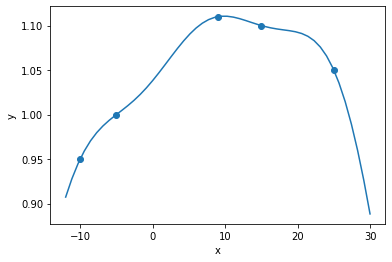

In [7]:
ys_pred = np.matmul(np.matmul(k, np.linalg.inv(K)), ys.reshape([-1,1]))
plt.plot(xs_test, ys_pred)
plt.scatter(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
# mean functions guessed by guassian process

In [16]:
k_test = k_fun(xs_test.reshape([test_num,-1]), xs_test.reshape([test_num,-1]))
sig_sq = .0005
var_test = sig_sq + np.diag(k_test) - np.diag(np.matmul(np.matmul(k, np.linalg.inv(K)), k.T))

Text(0, 0.5, 'y')

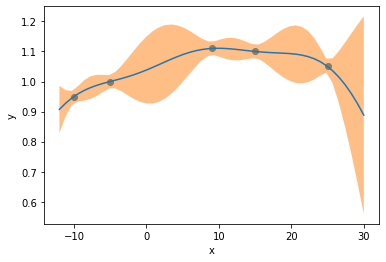

In [17]:
plt.plot(xs_test, ys_pred)
plt.scatter(xs, ys)
plt.fill_between(
    xs_test.ravel(),
    ys_pred.ravel() - np.sqrt(var_test),
    ys_pred.ravel() + np.sqrt(var_test),
    alpha=0.5
)
plt.xlabel('x')
plt.ylabel('y')
# variance graph

In [ ]:
# by using guassian process model, we can guess train data perfectly
# very flexable